Getting started with the linear advection model, 2025 version!
=============================================================

Author: Philipp Griewank

Basic starting point to get to know the linear advection model. More documentation to come here, but for now this is your starting point to understanding the model and it's core features


## ToDo
* Update to new code location
* Update with new plots
* Make sure Herbert Hartl could use it

## Done


In [1]:
from LinAdvFunc import *

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(color_codes = True)
sns.set_style('whitegrid')

## Run the model with default values and plot the first and last 5 timesteps

In [2]:
"""
initialize model and data assimilation setup using the default values. For now we will ignore the more complex satelitte observations that have a non-linear observation operator (-sat)
"""
m_const = set_model_constants_22()
da_const = set_da_constants_22(obs_loc_sat=np.array([]),obs_loc=np.array([50,100,150,200,250]),nens=10)
sat_operator = reflectance_simulator


In [3]:
da_const['ncyc']

100

In [4]:
%%time
# Run the model
states   = run_linear_advection_KF_22(m_const,da_const,reflectance_simulator)

CPU times: user 308 ms, sys: 8.97 ms, total: 317 ms
Wall time: 326 ms


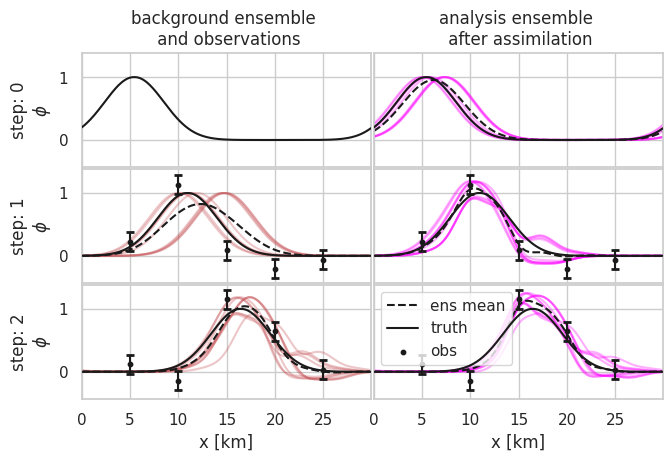

In [5]:
#Plotting first three assimilation steps

fig, ax = ensemble_plotter_22(states,m_const,da_const,t_start=0,t_end=3)

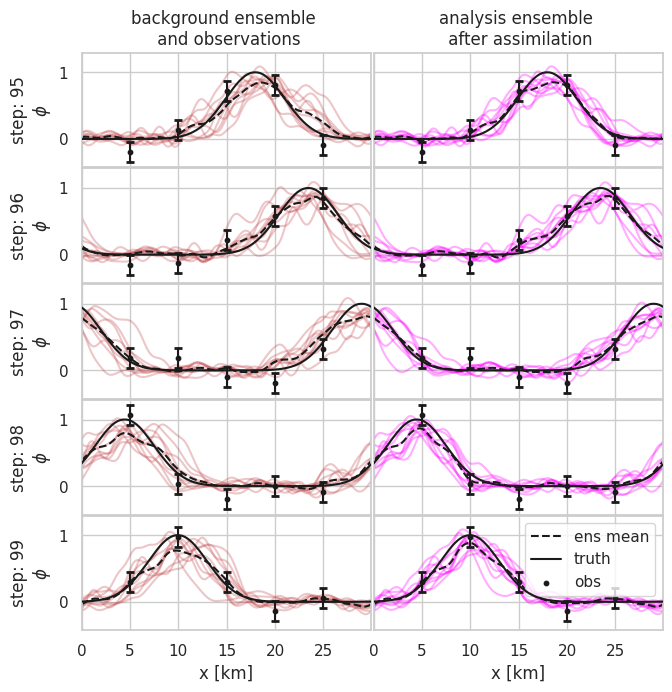

In [6]:
fig, ax = ensemble_plotter_22(states,m_const,da_const,t_start=da_const['ncyc']-5,t_end=da_const['ncyc'])


## Compute and plot RMSE and ensemble spread 

In [7]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states,da_const,m_const)

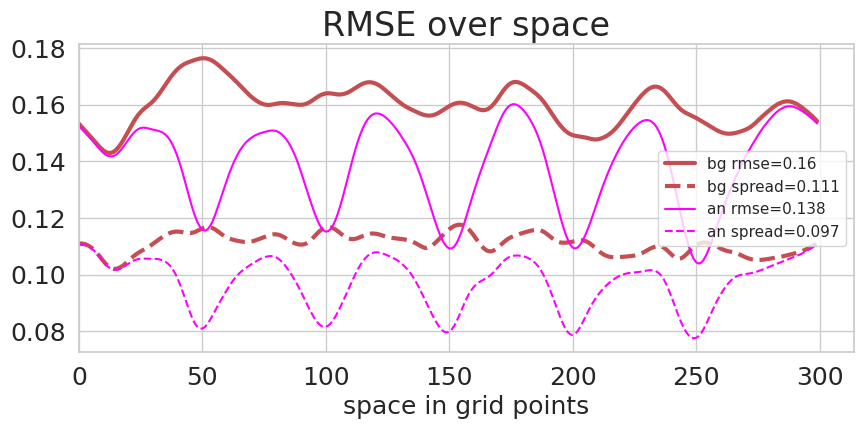

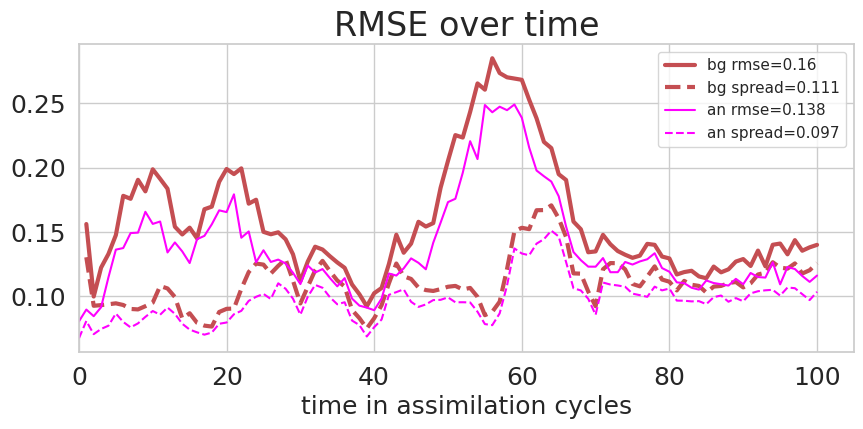

In [8]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)

## Plotting some covariance matrices for fun

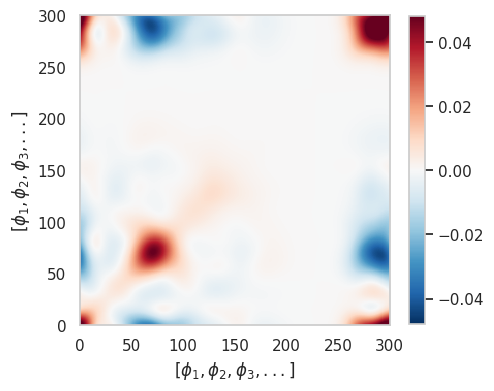

In [9]:
fig, ax = B_plotter(states,ncyc=10,matrix="an")

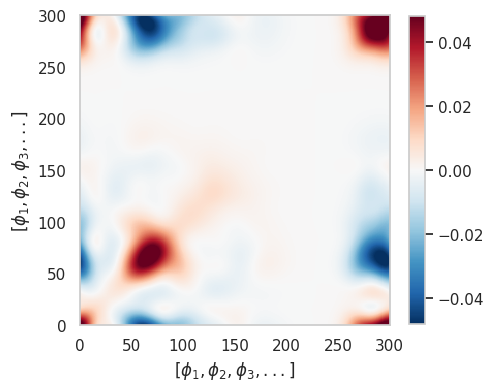

In [10]:
fig, ax = B_plotter(states,ncyc=10,matrix="bg")

# Varying localization

Example of how the EnKF is affected by removing localization of the observation.

 <!-- Observation points are slighly staggered to highlight effects.   -->

<!-- Please note that in the linear advection model localization does not reduce the model error. It is intended as a test and localization  -->

In [11]:
"""
Removing localization
"""
da_const_noloc = set_da_constants_22(obs_loc_sat=np.array([]),obs_loc=np.array([50,100,150,200,250]),loc=False)


In [12]:
states_noloc = run_linear_advection_KF_22(m_const,da_const_noloc,reflectance_simulator)

## Plot final timesteps with and without localization

(-0.4, 1.4)

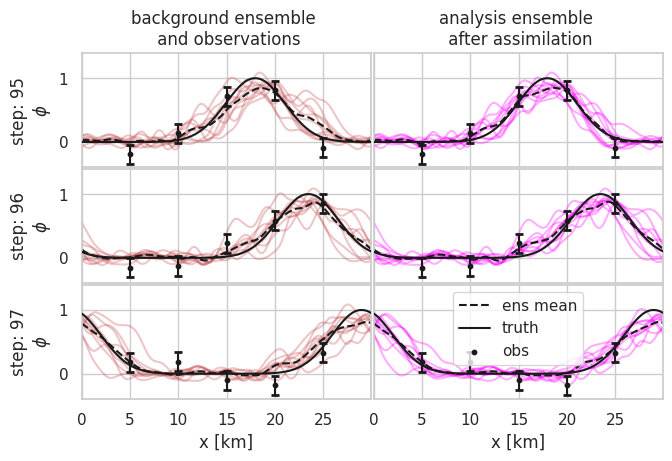

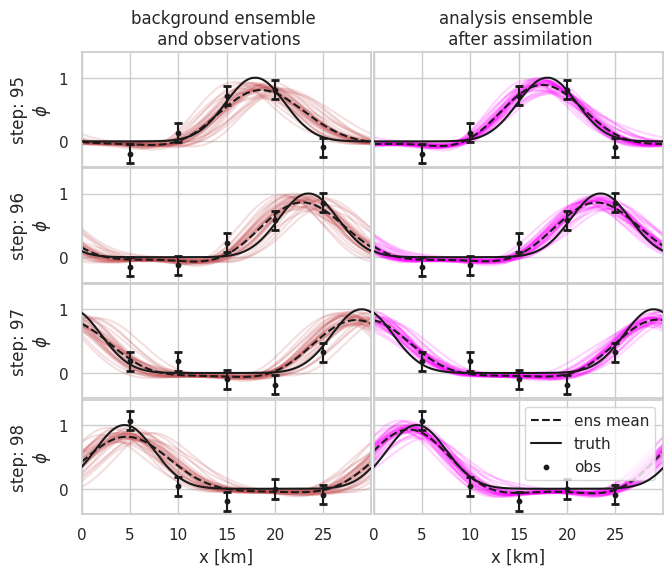

In [13]:
fig1, ax = ensemble_plotter_22(states,m_const,da_const,t_start=95,t_end=98)
ax[0,0].set_ylim(-0.4,1.4)
fig2, ax = ensemble_plotter_22(states_noloc,m_const,da_const_noloc,t_start=95,t_end=99)
ax[0,0].set_ylim(-0.4,1.4)


## Compute and plot RMSE and ensemble spread with and without localization

In [14]:
"""
Compute scores 
"""
rmse, spread = get_spread_and_rmse(states,da_const,m_const)
rmse_noloc, spread_noloc = get_spread_and_rmse(states_noloc,da_const_noloc,m_const)

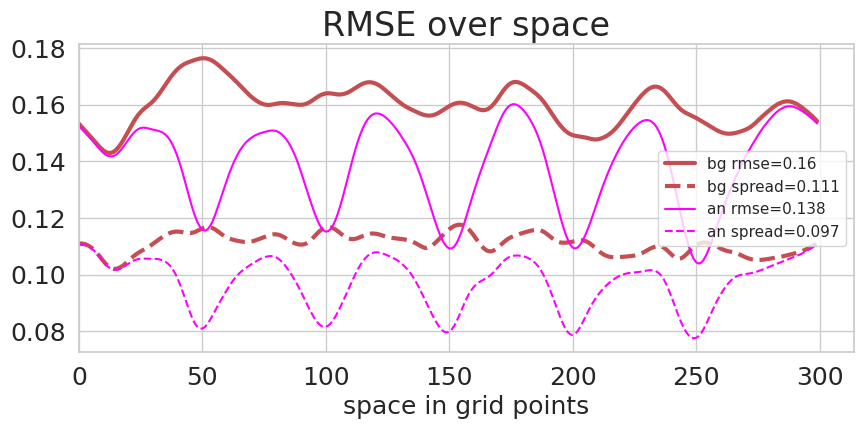

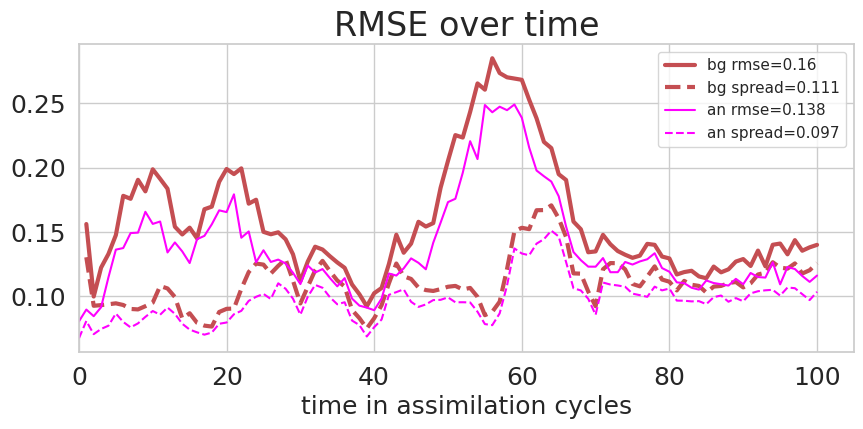

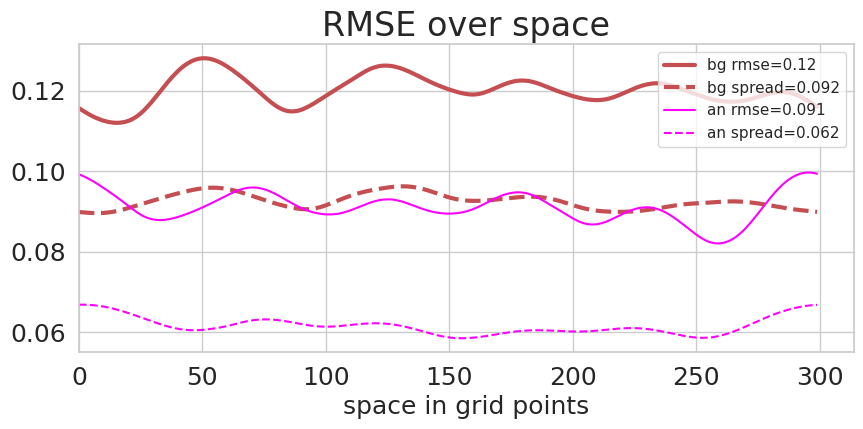

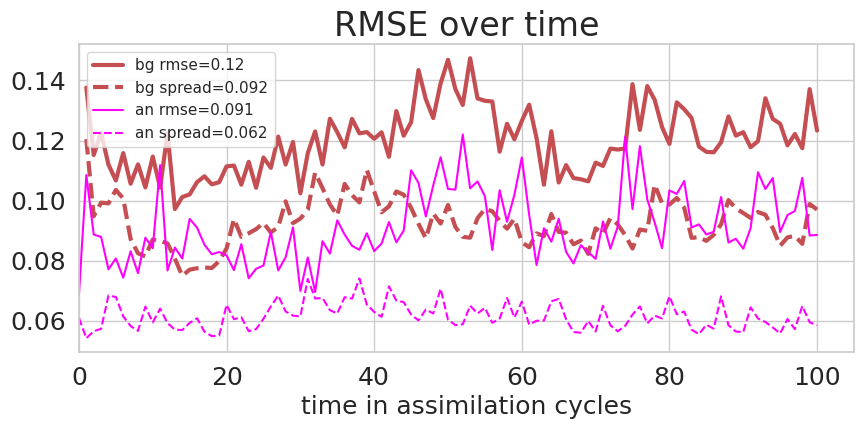

In [15]:
"""
plot RMSE over time and over space
"""
f = plot_scores_spread(rmse,spread)
f = plot_scores_spread(rmse_noloc,spread_noloc)

# Now going to single experiments, introducing quad

The quad variable contains 4 ensembles, the background, analysis, free-forecast, and forecast. It also contains the predicted variance reduction, and the  

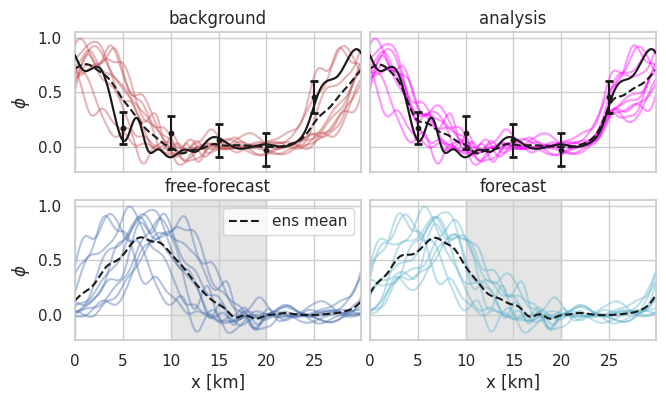

In [16]:
t_step=43 # which time step from the original run is used as the background
truth_idx=7 # Which ensemble member is used as the truth to generate the observations
vr_t, vr_i, vr_r,J_dict,dJdx_inv, quad, dx = vr_reloaded_22(states[0]['bg'][t_step],states[0]['bg'][t_step][:,truth_idx],m_const,da_const,sat_operator,obs_seed=22)
fig, ax = quad_plotter_25(quad,m_const,da_const)

# Important, obs_seed and model_seed control the random number generators!
These determine the observation errors and the perturbed model speed for each ensemble member. Here an example of the same experiment with different obs_seed and model_seed.

For individual experiments they should always be changed.
 

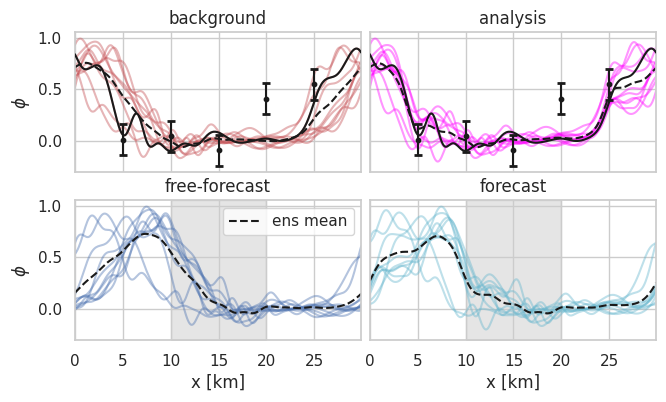

In [17]:
t_step=43 # which time step from the original run is used as the background
truth_idx=7 # Which ensemble member is used as the truth to generate the observations
vr_t, vr_i, vr_r,J_dict,dJdx_inv, quad, dx = vr_reloaded_22(states[0]['bg'][t_step],states[0]['bg'][t_step][:,truth_idx],m_const,da_const,sat_operator,obs_seed=21,model_seed=21)
fig, ax = quad_plotter_25(quad,m_const,da_const)

# Now to get to the variance reduction aspect.

vr_reloaded calculates the response function j for all single ensemble members in all 4 members. It also calculates the estimated variance reduction. Here is one of the paper plots for this experiment, showing the actual response function values of the free forecast and forcast along with a linearized approximation 

estimated and real var reductions: -35.483698189545066 -59.07948339102064
variance of free forecast, estimated variance of ff, and the same for the forecast: 104.15752065637281 103.44876540936646 45.07803726535217 67.96506721982139


/home/philipp/ucloud/pgriewank/code/2021-linear-advection/LinAdvFunc/plot_functions.py:1009: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['free-\nforecast','estimated \n free-forecast','\n forecast','estimated \n forecast'])
/tmp/ipykernel_7284/2985463827.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([r'$\mathbf{\delta j}_\mathrm{ff}$',r'$\widetilde{\mathbf{\delta j}_\mathrm{ff}}$',r'$\mathbf{\delta j}_\mathrm{fc}$',r'$\widetilde{\mathbf{\delta j}_\mathrm{fc}}$'],va='bottom')


Text(0.5, 0, '')

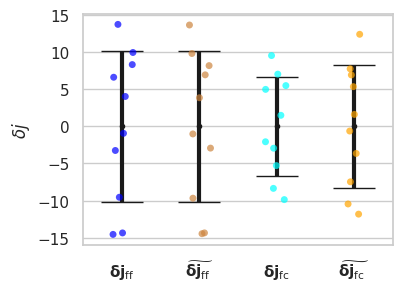

In [18]:
fig,ax = plot_J_quad_paper(J_dict,quad,dJdx_inv,dx,bw=0.2)
#ax.set_ylim(-70,55)
import matplotlib as mpl
# ax.set_ylabel(r'$\mathbf{\delta j}$')
ax.set_ylabel(r'$ \delta j$')
ax.set_xticklabels([r'$\mathbf{\delta j}_\mathrm{ff}$',r'$\widetilde{\mathbf{\delta j}_\mathrm{ff}}$',r'$\mathbf{\delta j}_\mathrm{fc}$',r'$\widetilde{\mathbf{\delta j}_\mathrm{fc}}$'],va='bottom')
ax.tick_params(axis='x', pad=20)
ax.set_xlabel('')

# This is now only for Herbert, namely an experiment he can use to test the impact of a single observation targeting.

_hh is used for Herbert Hartl

What is different is that we randomize the mean u of the model, and only use one observation.

Then Herbert has to use the estimated benefit to decide where to place the observation, vs placing the observation at the middle of the domain where the cost function is. 

## Todo Philipp: 
* setup new testcase with randomized mean u and one obs
* Put together a sensible set of settings (localization)
* Modify response function?
* Maybe put togethe

## Todo Herbert:
* Loop over possible placement to determine best location
* Calculate errors of ensemble mean fc and ff (same as bf) against the truth
* Look into time dependence



In [65]:
"""
initialize model and data assimilation setup using the default values. For now we will ignore the more complex satelitte observations that have a non-linear observation operator (-sat)
"""
m_const_hh = set_model_constants_22()
da_const_hh = set_da_constants_22(obs_loc_sat=np.array([]),obs_loc=np.array([150]),nens=10,used_std_obs=0.1,True_std_obs=0.1)


In [66]:
u_std_around_zero = 5.
u_seed = 1
np.random.seed(u_seed)

In [67]:
m_const_hh['u_ref'] = np.random.randn(1) * u_std_around_zero
m_const_hh['u_ref']


array([8.12172682])

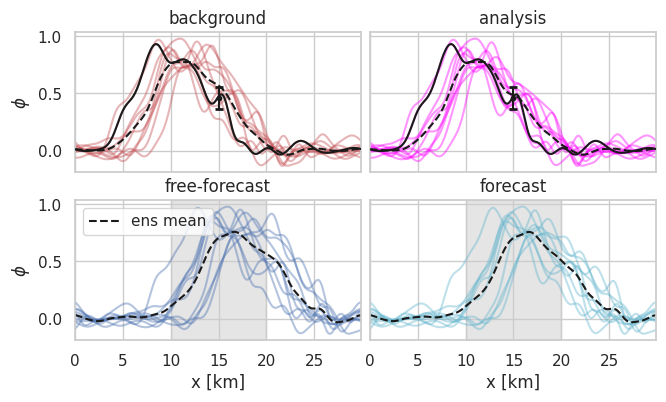

In [68]:
t_step=45 # which time step from the original run is used as the background
truth_idx=7 # Which ensemble member is used as the truth to generate the observations
vr_t, vr_i, vr_r,J_dict,dJdx_inv, quad, dx = vr_reloaded_22(states[0]['bg'][t_step],states[0]['bg'][t_step][:,truth_idx],m_const_hh,da_const_hh,sat_operator,obs_seed=22,func_J=mid_hh)
fig, ax = quad_plotter_25(quad,m_const_hh,da_const_hh)